<a href="https://colab.research.google.com/github/Ghiscode/Pengolahan-Citra-Digital/blob/main/Frekuensi_Transform.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. **Jelaskan manfaat melihat citra dalam bentuk frekuensi dibandingkan hanya dari pikselnya (domain spasial).**

Saat kita melihat gambar di layar, kita melihatnya dalam domain spasial (domain ruang), yaitu sebagai susunan piksel dan posisinya. Namun, citra juga bisa dilihat dalam domain frekuensi, yang berfokus pada bagaimana nilai piksel berubah-ubah atau berosilasi di seluruh gambar. Manfaat utamanya adalah memisahkan informasi dalam gambar berdasarkan tingkat perubahannya: Frekuensi rendah mewakili bagian gambar yang halus (perubahan piksel lambat) seperti area latar belakang , sementara frekuensi tinggi mewakili bagian detail atau tepi yang tajam (perubahan piksel cepat).

Melihat citra sebagai spektrum frekuensi sangat penting karena memungkinkan kita melakukan operasi pengolahan citra dengan presisi yang lebih tinggi. Contohnya, untuk menghilangkan noise, kita cukup mengidentifikasi dan mengurangi komponen frekuensi tinggi, tanpa merusak detail utama citra. Sebaliknya, untuk menajamkan gambar, kita dapat meningkatkan frekuensi tingginya.



**2. Apa perbedaan utama antara Transformasi Fourier, DCT, dan Wavelet dalam cara mereka menganalisis citra?**

Perbedaan mendasar antara ketiga transformasi ini terletak pada cara mereka menganalisis dan merepresentasikan informasi frekuensi dan posisi (lokalitas) dalam citra. Transformasi Fourier menguraikan citra menjadi komponen frekuensi global, artinya ia tahu frekuensi apa saja yang ada dalam gambar secara keseluruhan, tetapi tidak tahu secara spesifik di mana frekuensi tersebut berada (kurang lokalitas). Hal ini membuatnya cocok untuk analisis spektrum dan filter noise secara menyeluruh.

Selanjutnya, Discrete Cosine Transform (DCT) memiliki konsep mirip Fourier, tetapi hanya menggunakan gelombang kosinus dan sangat efisien dalam memadatkan energi citra di frekuensi rendah. Karena kemampuan efisiennya dalam mengonsentrasikan informasi penting, DCT adalah metode pilihan yang digunakan untuk kompresi citra pada format JPEG.

Terakhir, Wavelet Transform dianggap lebih canggih karena mampu menganalisis frekuensi dan posisi (lokalitas) secara bersamaan. Wavelet tahu frekuensi apa yang muncul dan di mana frekuensi itu terjadi dalam gambar. Kemampuan ini membuatnya sangat baik untuk deteksi detail lokal, menghilangkan noise secara spesifik, dan digunakan dalam kompresi citra yang lebih baru, seperti JPEG2000, serta analisis citra medis.

**1. Fourier Transform**

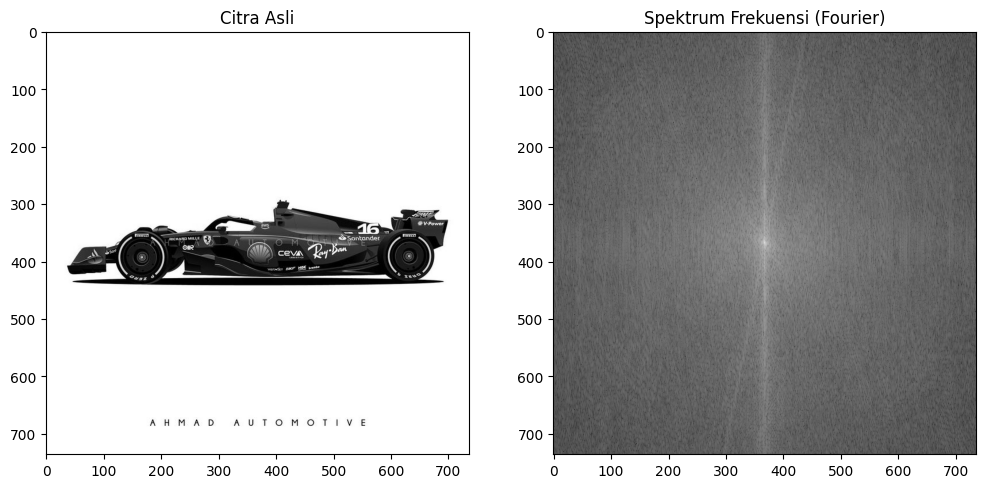

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Baca citra dalam grayscale
img = cv2.imread('foto2.jpeg', 0)

# Terapkan Fourier Transform
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)  # pusatkan frekuensi rendah di tengah
magnitude_spectrum = 20 * np.log(np.abs(fshift))

# Tampilkan hasil
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Citra Asli')
plt.imshow(img, cmap='gray')

plt.subplot(1,2,2)
plt.title('Spektrum Frekuensi (Fourier)')
plt.imshow(magnitude_spectrum, cmap='gray')
plt.show()

**Contoh FFT High - Pass**

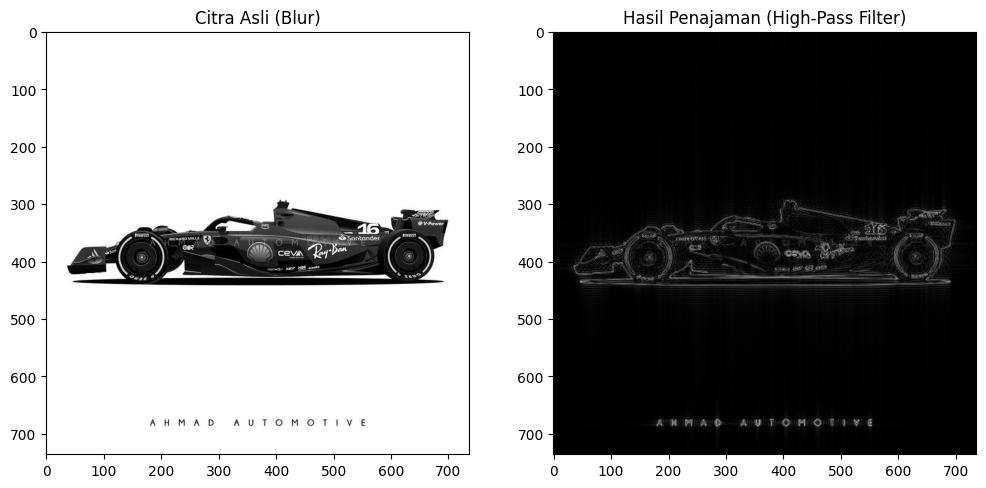

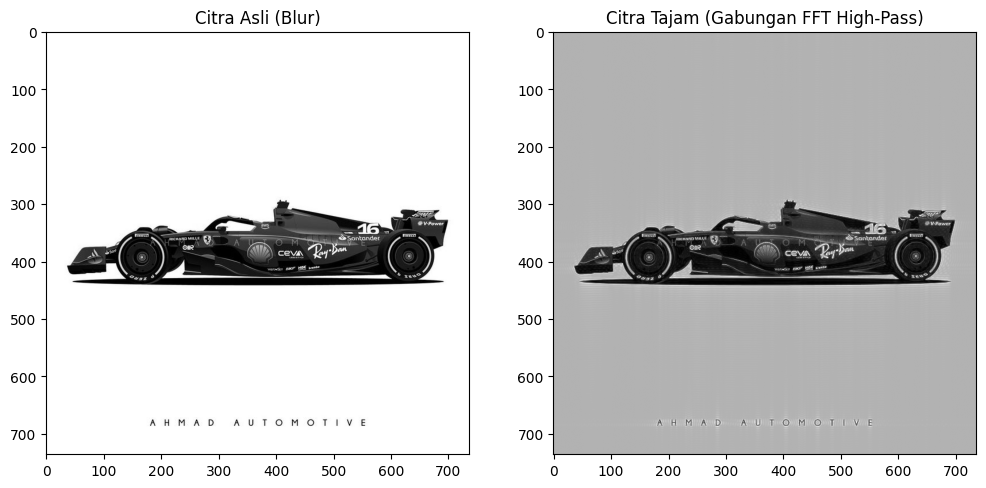

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Baca gambar grayscale
img = cv2.imread('foto2.jpeg', 0)

# Ubah ke domain frekuensi (FFT)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)

# Buat filter high-pass (frekuensi tinggi)
rows, cols = img.shape
crow, ccol = rows // 2, cols // 2

# Ukuran area tengah (low frequency) yang akan dihapus
mask = np.ones((rows, cols), np.uint8)
r = 90 # semakin besar r, semakin halus hasilnya
mask[crow - r:crow + r, ccol - r:ccol + r] = 0

# Terapkan mask high-pass
fshift_hp = fshift * mask

# Kembalikan ke domain spasial (Inverse FFT)
f_ishift = np.fft.ifftshift(fshift_hp)
img_hp = np.abs(np.fft.ifft2(f_ishift))

# Setelah kamu dapatkan img_hp (hasil high-pass)
# Gabungkan dengan citra asli agar tampak lebih tajam
sharpened = cv2.addWeighted(img, 0.7, img_hp.astype(np.uint8), 0.7, 0)




#  Bandingkan hasil
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Citra Asli (Blur)')
plt.imshow(img, cmap='gray')

plt.subplot(1,2,2)
plt.title('Hasil Penajaman (High-Pass Filter)')
plt.imshow(img_hp, cmap='gray')
plt.show()

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Citra Asli (Blur)')
plt.imshow(img, cmap='gray')

plt.subplot(1,2,2)
plt.title('Citra Tajam (Gabungan FFT High-Pass)')
plt.imshow(sharpened, cmap='gray')
plt.show()


**Contoh FFT - Low Pass**

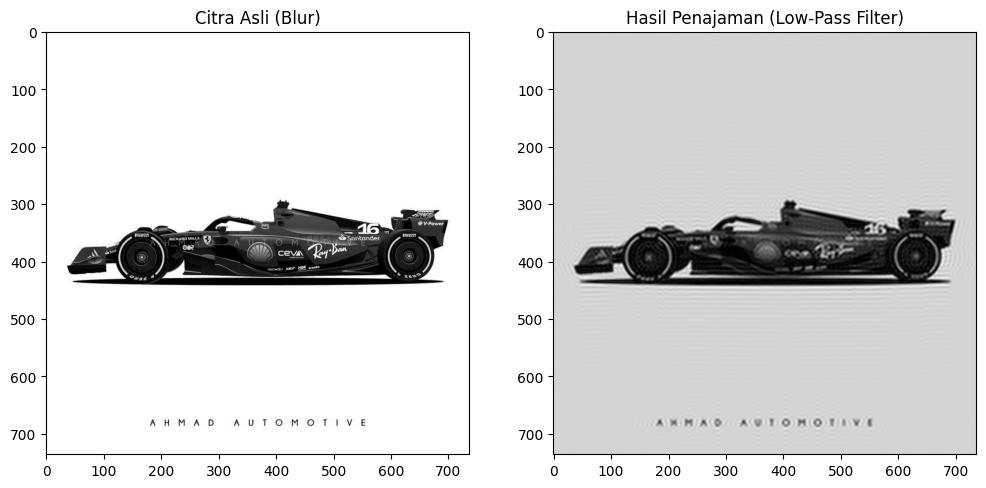

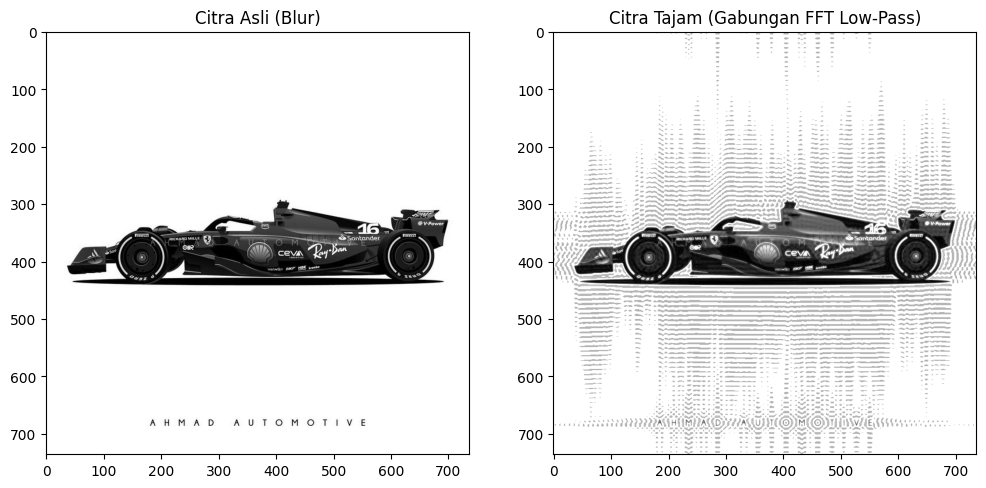

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Baca gambar grayscale
img = cv2.imread('foto2.jpeg', 0)

# Ubah ke domain frekuensi (FFT)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)

rows, cols = img.shape
crow, ccol = rows//2, cols//2
mask = np.zeros((rows, cols), np.uint8)
r = 90  # radius area tengah yang disimpan
mask[crow-r:crow+r, ccol-r:ccol+r] = 1

# apply mask
fshift_lp = fshift * mask


# Kembalikan ke domain spasial (Inverse FFT)
f_ishift = np.fft.ifftshift(fshift_lp)
img_hp = np.abs(np.fft.ifft2(f_ishift))

# Setelah kamu dapatkan img_hp (hasil high-pass)
# Gabungkan dengan citra asli agar tampak lebih tajam
sharpened = cv2.addWeighted(img, 0.7, img_hp.astype(np.uint8), 0.7, 0)


#  Bandingkan hasil
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Citra Asli (Blur)')
plt.imshow(img, cmap='gray')

plt.subplot(1,2,2)
plt.title('Hasil Penajaman (Low-Pass Filter)')
plt.imshow(img_hp, cmap='gray')
plt.show()

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Citra Asli (Blur)')
plt.imshow(img, cmap='gray')

plt.subplot(1,2,2)
plt.title('Citra Tajam (Gabungan FFT Low-Pass)')
plt.imshow(sharpened, cmap='gray')
plt.show()


**RGB High Pass**

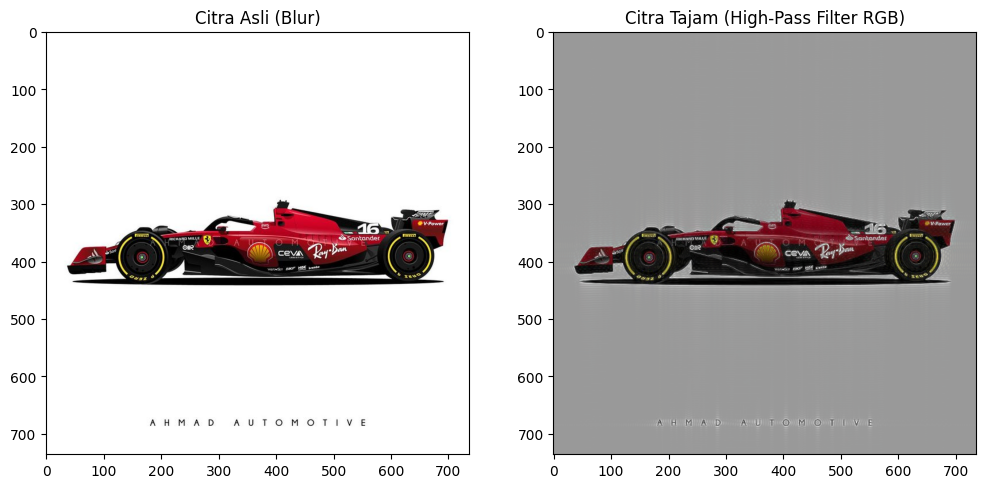

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Baca gambar berwarna
img = cv2.imread('foto2.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # ubah dari BGR ke RGB

# Siapkan parameter filter
rows, cols, _ = img.shape
crow, ccol = rows // 2, cols // 2
r = 90  # radius low frequency yang dihapus

# Buat mask high-pass (1 channel)
mask = np.ones((rows, cols), np.uint8)
mask[crow - r:crow + r, ccol - r:ccol + r] = 0

# Lakukan FFT untuk setiap channel warna
channels_hp = []
for i in range(3):  # R, G, B
    f = np.fft.fft2(img[:, :, i])
    fshift = np.fft.fftshift(f)
    fshift_hp = fshift * mask
    f_ishift = np.fft.ifftshift(fshift_hp)
    img_hp = np.abs(np.fft.ifft2(f_ishift))
    channels_hp.append(img_hp)

#  Gabungkan hasil 3 channel
img_hp_color = cv2.merge(channels_hp)
img_hp_color = cv2.normalize(img_hp_color, None, 0, 255, cv2.NORM_MINMAX)
img_hp_color = img_hp_color.astype(np.uint8)

# Gabungkan citra asli + hasil HPF agar tampak tajam
sharpened = cv2.addWeighted(img, 0.6, img_hp_color, 0.6, 0)

# Tampilkan hasil
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Citra Asli (Blur)')
plt.imshow(img)

plt.subplot(1,2,2)
plt.title('Citra Tajam (High-Pass Filter RGB)')
plt.imshow(sharpened)
plt.show()


**2. Discrete Cosine Transform (DCT)**

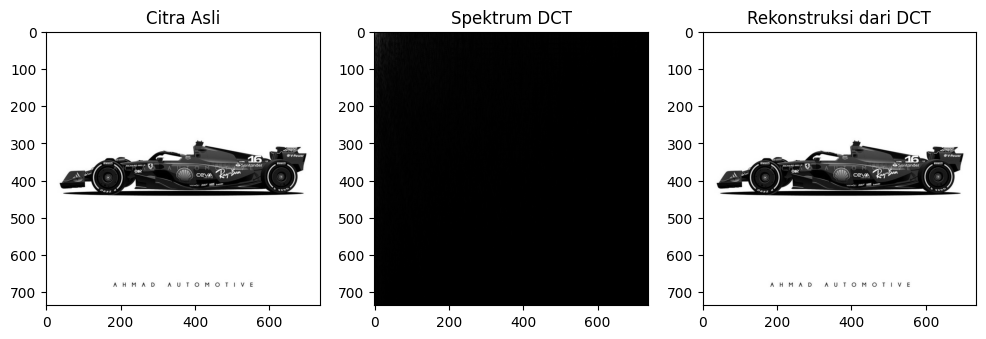

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

# Baca citra grayscale
img = cv2.imread('foto2.jpeg', 0)
img = np.float32(img) / 255.0  # normalisasi ke [0,1]

# Terapkan DCT
dct = cv2.dct(img)
dct_log = np.log(abs(dct) + 1)  # untuk tampilan visual

# Terapkan Inverse DCT (rekonstruksi citra)
idct = cv2.idct(dct)

# Tampilkan hasil
plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
plt.title('Citra Asli')
plt.imshow(img, cmap='gray')

plt.subplot(1,3,2)
plt.title('Spektrum DCT')
plt.imshow(dct_log, cmap='gray')

plt.subplot(1,3,3)
plt.title('Rekonstruksi dari DCT')
plt.imshow(idct, cmap='gray')
plt.show()

**3. Wavelet Transform**

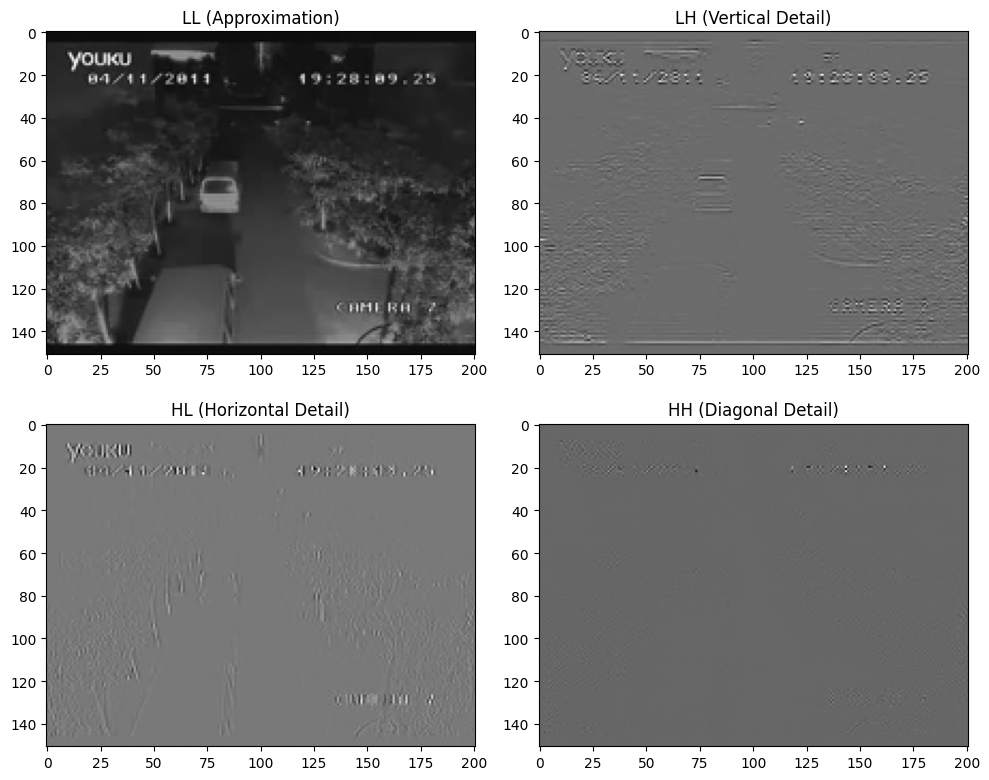

In [ ]:
import cv2
import pywt
import matplotlib.pyplot as plt

# Baca citra grayscale
img = cv2.imread('cctv.jpg', 0)

# Terapkan DWT (Discrete Wavelet Transform)
# coeffs2 = pywt.dwt2(img, 'haar')  # gunakan wavelet Haar
# LL, (LH, HL, HH) = coeffs2

# coeffs3 = pywt.dwt2(img, 'db1')  # gunakan wavelet Daubechies
# LL, (LH, HL, HH) = coeffs3

coeffs4 = pywt.dwt2(img, 'sym2')  # gunakan wavelet Sym
LL, (LH, HL, HH) = coeffs4

# Tampilkan hasil
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
plt.title('LL (Approximation)')
plt.imshow(LL, cmap='gray')

plt.subplot(2,2,2)
plt.title('LH (Vertical Detail)')
plt.imshow(LH, cmap='gray')

plt.subplot(2,2,3)
plt.title('HL (Horizontal Detail)')
plt.imshow(HL, cmap='gray')

plt.subplot(2,2,4)
plt.title('HH (Diagonal Detail)')
plt.imshow(HH, cmap='gray')

plt.tight_layout()
plt.show()
